In [1]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import fig_utils as ecfig

importlib.reload(linfit)
importlib.reload(ecfig)

<module 'ecpaper_utils.fig_utils' from '/home/islas/python/ecpaper2020/ecpaper_utils/fig_utils.py'>

In [2]:
cmip5jlats="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/jlatcmip5.nc"
cmip6jlats="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/jlatcmip6.nc"
cmip5errors="../ERRORCALC/JLAT/DATA/errors_cmip5.nc"
cmip6errors="../ERRORCALC/JLAT/DATA/errors_cmip6.nc"
obsjlat="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/jlatobs.nc"

In [3]:
jlat5=xr.open_dataset(cmip5jlats)
error5=xr.open_dataset(cmip5errors)
jlat6=xr.open_dataset(cmip6jlats)
error6=xr.open_dataset(cmip6errors)
jlatobs=xr.open_dataset(obsjlat)

Calculate CMIP5 regression coefficients and correlation

In [4]:
jlatp5 = jlat5['jlatemp']
jlatdif5 = jlat5['jlatemf']-jlat5['jlatemp']
sigy5 = error5['sigy']
sigx5 = error5['sigx']
rxy5 = error5['rxy']
jlatp5m = np.mean(jlatp5)
jlatdif5m=np.mean(jlatdif5)

aols5, bols5 = linfit.linfit_xy(jlatp5,jlatdif5, sigma=sigy5)
atls5, btls5 = linfit.tls(jlatp5, jlatdif5, sigx5, sigy5)
abhmall5, bbhmall5, del2all5, muxall5, delx2all5 = linfit.bhm(jlatp5, jlatdif5, sigx5, sigy5, rxy5, iseed=3)
abhm5 = np.mean(abhmall5) ; bbhm5 = np.mean(bbhmall5)

corcmip5=np.array(xr.corr(jlatp5, jlatdif5))
corcmip5str='{0:6.2f}'.format(corcmip5).strip()

In [5]:
jlatp6 = jlat6['jlatemp']
jlatdif6 = jlat6['jlatemf'] - jlat6['jlatemp']
sigy6 = error6['sigy']
sigx6 = error6['sigx']
rxy6 = error6['rxy']
jlatp6m = np.mean(jlatp6)
jlatdif6m = np.mean(jlatdif6)

aols6, bols6 = linfit.linfit_xy(jlatp6, jlatdif6, sigma=sigy6)
atls6, btls6 = linfit.tls(jlatp6, jlatdif6, sigx6, sigy6)
abhmall6, bbhmall6, del2all6, muxall6, delx2all6 = linfit.bhm(jlatp6, jlatdif6, sigx6, sigy6, rxy6, iseed=3)
abhm6 = np.mean(abhmall6) ; bbhm6 = np.mean(bbhmall6)

corcmip6 = np.array(xr.corr(jlatp6, jlatdif6))
corcmip6str='{0:6.2f}'.format(corcmip6).strip()

In [6]:
# setting up legend
from matplotlib.lines import Line2D
legendparts = [Line2D([0],[0], color='black', linestyle='solid', linewidth=2),
              Line2D([0],[0], color='black', linestyle='dotted', linewidth=2),
              Line2D([0],[0], color='black', linestyle='dashed', linewidth=2),
              Line2D([0],[0], color='black', linestyle='dashdot', linewidth=2),
              Line2D([0],[0], color='w', marker='o', markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2),
              Line2D([0],[0], color='w', marker='o', markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2),
              Line2D([0],[0], color='saddlebrown', linestyle='dashed', linewidth=3),
              Line2D([0],[0], color='forestgreen', linestyle='dashed', linewidth=3),
              Line2D([0],[0], color='blueviolet', linestyle='dashed', linewidth=3)]

legendlabels=['ERA5','ERA-Interim','JRA-55','MERRA2','CMIP5','CMIP6','OLS','TLS','BHM']

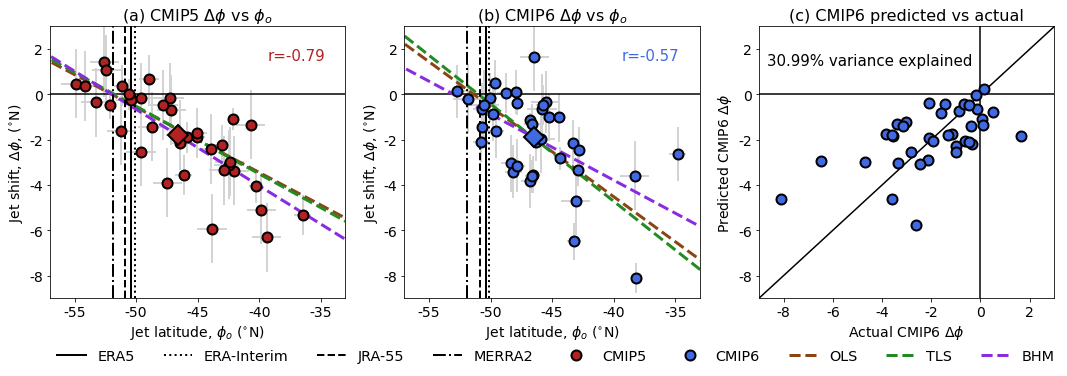

In [7]:
# set up the plot characteristics
fig, axs = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(18,5)

# ------- CMIP5 model scatter plot -----------------

# error bars
yerr = 1.96*sigy5
xerr = 1.96*sigx5

# zero line
axs[0].plot([-57,-33],[0,0], color="black")

# OLS regression
x = np.arange(-58,-22,1)
y = aols5+bols5*x
axs[0].plot(x,y, color='saddlebrown', linewidth=3, linestyle='dashed')

# TLS regression
y = atls5+btls5*x
axs[0].plot(x,y, color='forestgreen', linewidth=3, linestyle='dashed')

# BHM regression
y = abhm5 + bbhm5*x
axs[0].plot(x,y, color='blueviolet', linewidth=3, linestyle='dashed')


axs[0].plot([jlatobs["jlatera5"], jlatobs["jlatera5"]],[-9,3], color="black", linewidth=2)
axs[0].plot([jlatobs["jlaterai"], jlatobs["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
axs[0].plot([jlatobs["jlatjra"], jlatobs["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
axs[0].plot([jlatobs["jlatmerra"], jlatobs["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)
axs[0].plot(jlatp5, jlatdif5,"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)
axs[0].plot(jlatp5m, jlatdif5m, "D", markerfacecolor='firebrick', markeredgecolor='black', markersize=14, markeredgewidth=2)

axs[0] = ecfig.jlatscattersetup(axs[0],"(a) CMIP5 $\Delta \phi$ vs $\phi_{o}$")
axs[0].text(-37,1.7,"r="+corcmip5str, horizontalalignment='center', verticalalignment='center', fontsize=15, color='firebrick')

axs[0].errorbar(jlatp5,jlatdif5,yerr = yerr, linestyle="None", color='lightgrey', linewidth=2)
axs[0].errorbar(jlatp5,jlatdif5,xerr = xerr, linestyle="None", color='lightgrey', linewidth=2)


#------ End CMIP6 model scatter plot ------------------

# -----CMIP6 model scatter plot -----------------------

# error bars
yerr = 1.96*sigy6
xerr = 1.96*sigx6

# zero line
axs[1].plot([-57,-33],[0,0], color="black")

# OLS regression
x = np.arange(-58,-22,1)
y = aols6+bols6*x
axs[1].plot(x,y, color='saddlebrown', linewidth=3, linestyle='dashed')

# TLS regression
y = atls6+btls6*x
axs[1].plot(x,y, color='forestgreen', linewidth=3, linestyle='dashed')

# BHM regression
y = abhm6 + bbhm6*x
axs[1].plot(x,y, color='blueviolet', linewidth=3, linestyle='dashed')

axs[1].plot([jlatobs["jlatera5"], jlatobs["jlatera5"]],[-9,3], color="black", linewidth=2)
axs[1].plot([jlatobs["jlaterai"], jlatobs["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
axs[1].plot([jlatobs["jlatjra"], jlatobs["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
axs[1].plot([jlatobs["jlatmerra"], jlatobs["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)
axs[1].plot(jlatp6, jlatdif6,"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
axs[1].plot(jlatp6m, jlatdif6m, "D", markerfacecolor='royalblue', markeredgecolor='black', markersize=14, markeredgewidth=2)
axs[1] = ecfig.jlatscattersetup(axs[1],"(b) CMIP6 $\Delta \phi$ vs $\phi_{o}$")

axs[1].text(-37,1.7,"r="+corcmip6str, horizontalalignment='center', verticalalignment='center', fontsize=15, color='royalblue')

axs[1].errorbar(jlatp6,jlatdif6,yerr = yerr, linestyle="None", color='lightgrey', linewidth=2)
axs[1].errorbar(jlatp6,jlatdif6,xerr = xerr, linestyle="None", color='lightgrey', linewidth=2)

# -------------------------------------------------------

# -------CMIP6 predicted from CMIP5 ---------------------

cmip6predict = abhm5 + bbhm5*jlatp6
cmip6remaining = jlatdif6 - cmip6predict
varcmip6 = np.var(jlatdif6)
varcmip6remaining = np.var(cmip6remaining)
varexplained = ((varcmip6 - varcmip6remaining)/varcmip6)*100.
varexplainedstr = '{0:6.2f}'.format(np.array(varexplained)).strip()


axs[2].plot([-9,3],[-9,3],color="black")
axs[2].plot([-9,3],[0,0],color="black")
axs[2].plot([0,0],[-9,3],color="black")
axs[2].plot(jlatdif6, cmip6predict, "o", markerfacecolor="royalblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
axs[2].set_xlim(-9,3)
axs[2].set_ylim(-9,3)
axs[2].set_yticks([-8,-6,-4,-2,0,2])
axs[2].set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
axs[2].set_xticks([-8,-6,-4,-2,0,2])
axs[2].set_xticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
axs[2].set_xlabel("Actual CMIP6 $\Delta \phi$", fontsize=14)
axs[2].set_ylabel("Predicted CMIP6 $\Delta \phi$", fontsize=14)
axs[2].set_title("(c) CMIP6 predicted vs actual", fontsize=16)
axs[2].text(-4.5,1.5,varexplainedstr+"% variance explained", horizontalalignment='center', verticalalignment='center', fontsize=15, color='black')

fig.legend(legendparts, legendlabels, bbox_to_anchor = (0.91, 0.02), ncol=9, frameon = False, fontsize='x-large')
#plt.show()
plt.savefig('fig2.pdf', facecolor='white', bbox_inches='tight')



